<a href="https://colab.research.google.com/github/YuXia-SR/DS_RL/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to find good NLP data sources:

### 1. [Big NLP Database](https://datasets.quantumstat.com)
 - [Another Big List](https://github.com/niderhoff/nlp-datasets)


### 2. Kaggle/Google/Github + 'dataset' or 'topic'
 - https://github.com/topics/computational-social-science


### 3. APIs and Github for access
 - Reddit: [Pushshift API](https://pushshift.io)
 - Twitter: [Python API wrapper](https://github.com/geduldig/TwitterAPI)
 - TikTok: [TikTok Scraper](https://github.com/davidteather/TikTok-Api)


### 4. Google Scholar / research papers
 - [Google Scholar](https://scholar.google.com)
 - [Chinese NLP Tasks](https://chinesenlp.xyz/#/)
 - [State of the Art (SoTA) DB](https://paperswithcode.com/area/natural-language-processing)
 - [Another State of the Art DB](http://nlpprogress.com/)
 - [Conference Workshops](https://www.aclweb.org/anthology/volumes/2020.nlpcss-1/)



### 5. Get it yourself: Web scraping
 - [Beautiful Soup HTML Scraping](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
 - [Selenium Web-session Scraping](https://selenium-python.readthedocs.io)

This step of research often takes the longest. Save time by using a pre-cleaned and well documented dataset.

# Part 1: NLTK Loading Data

In [ ]:
import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

movie_reviews.words()
print(f'Number of words in dataset: {len(movie_reviews.words())}')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Number of words in dataset: 1583820


In [ ]:
from collections import Counter

# count words 
counter = Counter()
counter += Counter(movie_reviews.words())

print(counter.most_common(10))
print(counter.get('amazing'))

print('\n')

# nltk word frequency 
print(nltk.FreqDist(movie_reviews.words()).most_common(10))
print(nltk.FreqDist(movie_reviews.words())['amazing'])

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]
184


[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]
184


In [ ]:
# where the data comes from
files = movie_reviews.fileids()
print(files[0:10])
print(f'Number of files in dataset: {len(files)}')

review = movie_reviews.words(files[50])
review

['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
Number of files in dataset: 2000


['my', 'giant', 'is', 'two', 'movies', 'for', 'the', ...]

We can use the 'join' function to concatenate the words in the review:

In [ ]:
print(review)
' '.join(review)

['my', 'giant', 'is', 'two', 'movies', 'for', 'the', ...]


'my giant is two movies for the price of one , but neither is worth the cost of admission , even if you get in free . as lamely directed by michael lehmann , the picture tries to be a comedy by using and reusing every giant joke in the book . ( " without goliath , david is just some punk throwing rocks . " ) languidly paced throughout , the movie becomes increasingly lugubrious as the screenplay by david seltzer ( the omen ) meanders toward its sad ending . since it \' s rarely funny or convincingly dramatic , what the filmmakers thought they were doing remains a mystery . other than a few nice visuals , there \' s nothing to recommend the picture . with great film comedies under his belt from when harry met sally ? to the original city slickers , billy crystal has shown that he \' s more than the world \' s best oscar host . he does , however , have a propensity for choosing hopeless material as in last year \' s father \' s day and this year \' s my giant . one wonders if he reads th

In [ ]:
# removing punctuation

import string
print(string.punctuation)

review_joined = ''
for word in review:
    #print(word)
    #review_joined += word + ' '
    
    # don't add white space if punctuation
    if word in string.punctuation:
        #print(word)
        review_joined += word 
    else:
        review_joined += ' ' + word
  
print(review_joined)
#print(review_joined.strip())

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
 my giant is two movies for the price of one, but neither is worth the cost of admission, even if you get in free. as lamely directed by michael lehmann, the picture tries to be a comedy by using and reusing every giant joke in the book.(" without goliath, david is just some punk throwing rocks.") languidly paced throughout, the movie becomes increasingly lugubrious as the screenplay by david seltzer( the omen) meanders toward its sad ending. since it' s rarely funny or convincingly dramatic, what the filmmakers thought they were doing remains a mystery. other than a few nice visuals, there' s nothing to recommend the picture. with great film comedies under his belt from when harry met sally? to the original city slickers, billy crystal has shown that he' s more than the world' s best oscar host. he does, however, have a propensity for choosing hopeless material as in last year' s father' s day and this year' s my giant. one wonders if he reads the scri

In [ ]:
print(review[0:20])

['my', 'giant', 'is', 'two', 'movies', 'for', 'the', 'price', 'of', 'one', ',', 'but', 'neither', 'is', 'worth', 'the', 'cost', 'of', 'admission', ',']


Other corpora available through the nltk package: https://www.nltk.org/nltk_data/

# Part 2: Loading in Local .txt Files

To promote reproducibility, upload your data to google drive. Then, connect your google colab to your google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
!ls ./gdrive/MyDrive/labs

imdb_files.zip	imdb.zip


In [ ]:
!unzip ./gdrive/MyDrive/labs/imdb_files.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/pos/7269_7.txt    
  inflating: train/pos/5392_10.txt   
  inflating: train/pos/10177_9.txt   
  inflating: train/pos/4684_8.txt    
  inflating: train/pos/11803_7.txt   
  inflating: train/pos/11912_10.txt  
  inflating: train/pos/11040_7.txt   
  inflating: train/pos/8414_7.txt    
  inflating: train/pos/10132_9.txt   
  inflating: train/pos/2806_10.txt   
  inflating: train/pos/10971_9.txt   
  inflating: train/pos/802_10.txt    
  inflating: train/pos/12373_7.txt   
  inflating: train/pos/860_8.txt     
  inflating: train/pos/10005_7.txt   
  inflating: train/pos/9080_7.txt    
  inflating: train/pos/8523_9.txt    
  inflating: train/pos/10491_7.txt   
  inflating: train/pos/4919_7.txt    
  inflating: train/pos/11812_10.txt  
  inflating: train/pos/5025_10.txt   
  inflating: train/pos/11667_9.txt   
  inflating: train/pos/9341_7.txt    
  inflating: train/pos/7633_8.txt    
  inflating: train/pos/5545_8.txt    

In [ ]:
f = open('./train/neg/0_3.txt')
raw = f.read()
raw

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [ ]:
import os
os.listdir('./train/neg')[0:10]

['3650_2.txt',
 '1825_2.txt',
 '4220_2.txt',
 '2952_2.txt',
 '2829_1.txt',
 '6255_1.txt',
 '7432_4.txt',
 '9265_1.txt',
 '5718_1.txt',
 '12423_2.txt']

In [ ]:
imdb_dir = './train'

neg_reviews = []
for file in os.listdir(imdb_dir + '/neg'):
    #print(file)
    f = open(imdb_dir + '/neg/' + file)
    raw = f.read()
    neg_reviews.append([raw, 'neg'])

neg_reviews[0:10]

[['No laughs whatsoever. Yes, I watched this entire train wreck but only so that I wouldn\'t later wonder if Cleese had come to his senses in the latter part. (No, he had not.) <br /><br />This may be historically interesting to you youngsters out there, to see that British "humor" included black "jokes" like these, thirty years ago. <br /><br />What amazes me even more though, is to read the other reviewers\' comments, which acknowledge this isn\'t very good, yet then turn around and give it high votes. If the vast majority of the comedies that you have seen are even much worse than this one, then I certainly pity your torturous existences. <br /><br />The humor level of this show appears aimed at little kids, yet the subject matter does not. So who is this for? People who enjoy repeated & drawn-out double-takes, pratfalls, drug jokes (interesting only as a short trip back to \'77), and other "low" humor. The Three Stooges are still funny, and were to me as a kid, too. THEY exerted so

In [ ]:
reviews = []
for file in os.listdir(imdb_dir + '/neg'):
    #print(file)
    f = open(imdb_dir + '/neg/' + file)
    raw = f.read()
    reviews.append([raw, 'neg'])
    
for file in os.listdir(imdb_dir + '/pos'):
    #print(file)
    f = open(imdb_dir + '/pos/' + file)
    raw = f.read()
    reviews.append([raw, 'pos'])

In [ ]:
import pandas as pd

imdb = pd.DataFrame(reviews, columns = ['text', 'sentiment'])
imdb.loc[imdb['sentiment'] == 'neg', 'sentiment'] = 0 
imdb.loc[imdb['sentiment'] == 'pos', 'sentiment'] = 1 
imdb

,text,sentiment
0,"No laughs whatsoever. Yes, I watched this enti...",0
1,I'm not sure what. I just couldn't laugh at it...,0
2,A short review but...<br /><br />Avoid at all ...,0
3,From watching only the trailer to Theodore Rex...,0
4,"The worst, and chock full of people who really...",0
...,...,...
24995,"WOW, finally Jim Carrey has returned from the ...",1
24996,Atlantis was much better than I had anticipate...,1
24997,Normally I don't like series at all. They're a...,1
24998,I'm going to review the 2 films as a whole bec...,1


# Part 2: Processing 

# Processing Part 1: Cleaning

In [ ]:
review = imdb.text[4873]
print(review)

It is a pity that you cannot vote zero stars on IMDb, because I would not have hesitated! In fact I would go so far as to say that this film was in the negative stars. <br /><br />I, like many others, bought this film thinking that because it has Michael Madsen in it, it could be good... No chance! This film was shocking! Imagine a movie length 'The Bold and the Beautiful', well, Primal Instinct did not even come close to that good, and I had previously thought that there would be nothing worse than a movie length 'The Bold and the Beautiful'. <br /><br />Michael Madsen, how could you do this to us? The worst part is, I didn't fast forward a bit, I was hoping that at the end they would reveal that it was all some sort of sick joke, that they thought it would be funny to make us watch such a horribly bad film.<br /><br />Where do I start...? Directing - Zero Stars, Screenplay - Zero Stars, Acting - Zero Stars, Cinematography - Zero Stars, Digital Effects - Zero Stars, Production Design 

### Cleaning HTML

In [ ]:
# replace
review.replace('<br /><br />', '')

# regex
import re
re.sub('<[^<]+?>', '', review)

# NLTK/BS4 functions
from bs4 import BeautifulSoup
soup = BeautifulSoup(review)
soup.get_text()

"It is a pity that you cannot vote zero stars on IMDb, because I would not have hesitated! In fact I would go so far as to say that this film was in the negative stars. I, like many others, bought this film thinking that because it has Michael Madsen in it, it could be good... No chance! This film was shocking! Imagine a movie length 'The Bold and the Beautiful', well, Primal Instinct did not even come close to that good, and I had previously thought that there would be nothing worse than a movie length 'The Bold and the Beautiful'. Michael Madsen, how could you do this to us? The worst part is, I didn't fast forward a bit, I was hoping that at the end they would reveal that it was all some sort of sick joke, that they thought it would be funny to make us watch such a horribly bad film.Where do I start...? Directing - Zero Stars, Screenplay - Zero Stars, Acting - Zero Stars, Cinematography - Zero Stars, Digital Effects - Zero Stars, Production Design - Zero Stars, Make-up - Zero Stars,

### Capitalization and Punctuation

In [ ]:
# capitalization
review.upper()
review.lower()


"it is a pity that you cannot vote zero stars on imdb, because i would not have hesitated! in fact i would go so far as to say that this film was in the negative stars. <br /><br />i, like many others, bought this film thinking that because it has michael madsen in it, it could be good... no chance! this film was shocking! imagine a movie length 'the bold and the beautiful', well, primal instinct did not even come close to that good, and i had previously thought that there would be nothing worse than a movie length 'the bold and the beautiful'. <br /><br />michael madsen, how could you do this to us? the worst part is, i didn't fast forward a bit, i was hoping that at the end they would reveal that it was all some sort of sick joke, that they thought it would be funny to make us watch such a horribly bad film.<br /><br />where do i start...? directing - zero stars, screenplay - zero stars, acting - zero stars, cinematography - zero stars, digital effects - zero stars, production design

In [ ]:
print(review[0])
review[0].isupper()

I


True

In [ ]:
# puncutation
punctuation = string.punctuation
#punctuation = punctuation.replace('!', '')

clean_review = ''
for letter in review:
    if letter not in punctuation:
        clean_review += letter

clean_review

'It is a pity that you cannot vote zero stars on IMDb because I would not have hesitated In fact I would go so far as to say that this film was in the negative stars br br I like many others bought this film thinking that because it has Michael Madsen in it it could be good No chance This film was shocking Imagine a movie length The Bold and the Beautiful well Primal Instinct did not even come close to that good and I had previously thought that there would be nothing worse than a movie length The Bold and the Beautiful br br Michael Madsen how could you do this to us The worst part is I didnt fast forward a bit I was hoping that at the end they would reveal that it was all some sort of sick joke that they thought it would be funny to make us watch such a horribly bad filmbr br Where do I start Directing  Zero Stars Screenplay  Zero Stars Acting  Zero Stars Cinematography  Zero Stars Digital Effects  Zero Stars Production Design  Zero Stars Makeup  Zero Stars Casting  Zero Stars Editin

### Removing Stop Words

In [ ]:
# why we must first tokenize
for word in review:
    print(word) # can only print letters

review.replace('is', '') # not a good way to replace words

I
t
 
i
s
 
a
 
p
i
t
y
 
t
h
a
t
 
y
o
u
 
c
a
n
n
o
t
 
v
o
t
e
 
z
e
r
o
 
s
t
a
r
s
 
o
n
 
I
M
D
b
,
 
b
e
c
a
u
s
e
 
I
 
w
o
u
l
d
 
n
o
t
 
h
a
v
e
 
h
e
s
i
t
a
t
e
d
!
 
I
n
 
f
a
c
t
 
I
 
w
o
u
l
d
 
g
o
 
s
o
 
f
a
r
 
a
s
 
t
o
 
s
a
y
 
t
h
a
t
 
t
h
i
s
 
f
i
l
m
 
w
a
s
 
i
n
 
t
h
e
 
n
e
g
a
t
i
v
e
 
s
t
a
r
s
.
 
<
b
r
 
/
>
<
b
r
 
/
>
I
,
 
l
i
k
e
 
m
a
n
y
 
o
t
h
e
r
s
,
 
b
o
u
g
h
t
 
t
h
i
s
 
f
i
l
m
 
t
h
i
n
k
i
n
g
 
t
h
a
t
 
b
e
c
a
u
s
e
 
i
t
 
h
a
s
 
M
i
c
h
a
e
l
 
M
a
d
s
e
n
 
i
n
 
i
t
,
 
i
t
 
c
o
u
l
d
 
b
e
 
g
o
o
d
.
.
.
 
N
o
 
c
h
a
n
c
e
!
 
T
h
i
s
 
f
i
l
m
 
w
a
s
 
s
h
o
c
k
i
n
g
!
 
I
m
a
g
i
n
e
 
a
 
m
o
v
i
e
 
l
e
n
g
t
h
 
'
T
h
e
 
B
o
l
d
 
a
n
d
 
t
h
e
 
B
e
a
u
t
i
f
u
l
'
,
 
w
e
l
l
,
 
P
r
i
m
a
l
 
I
n
s
t
i
n
c
t
 
d
i
d
 
n
o
t
 
e
v
e
n
 
c
o
m
e
 
c
l
o
s
e
 
t
o
 
t
h
a
t
 
g
o
o
d
,
 
a
n
d
 
I
 
h
a
d
 
p
r
e
v
i
o
u
s
l
y
 
t
h
o
u
g
h
t
 
t
h
a
t
 
t
h
e
r
e
 
w
o
u
l
d
 
b
e
 
n
o
t
h
i
n
g
 
w
o
r
s
e
 


"It  a pity that you cannot vote zero stars on IMDb, because I would not have hesitated! In fact I would go so far as to say that th film was in the negative stars. <br /><br />I, like many others, bought th film thinking that because it has Michael Madsen in it, it could be good... No chance! Th film was shocking! Imagine a movie length 'The Bold and the Beautiful', well, Primal Instinct did not even come close to that good, and I had previously thought that there would be nothing worse than a movie length 'The Bold and the Beautiful'. <br /><br />Michael Madsen, how could you do th to us? The worst part , I didn't fast forward a bit, I was hoping that at the end they would reveal that it was all some sort of sick joke, that they thought it would be funny to make us watch such a horribly bad film.<br /><br />Where do I start...? Directing - Zero Stars, Screenplay - Zero Stars, Acting - Zero Stars, Cinematography - Zero Stars, Digital Effects - Zero Stars, Production Design - Zero Star

In [ ]:
review.split(' ')

['It',
 'is',
 'a',
 'pity',
 'that',
 'you',
 'cannot',
 'vote',
 'zero',
 'stars',
 'on',
 'IMDb,',
 'because',
 'I',
 'would',
 'not',
 'have',
 'hesitated!',
 'In',
 'fact',
 'I',
 'would',
 'go',
 'so',
 'far',
 'as',
 'to',
 'say',
 'that',
 'this',
 'film',
 'was',
 'in',
 'the',
 'negative',
 'stars.',
 '<br',
 '/><br',
 '/>I,',
 'like',
 'many',
 'others,',
 'bought',
 'this',
 'film',
 'thinking',
 'that',
 'because',
 'it',
 'has',
 'Michael',
 'Madsen',
 'in',
 'it,',
 'it',
 'could',
 'be',
 'good...',
 'No',
 'chance!',
 'This',
 'film',
 'was',
 'shocking!',
 'Imagine',
 'a',
 'movie',
 'length',
 "'The",
 'Bold',
 'and',
 'the',
 "Beautiful',",
 'well,',
 'Primal',
 'Instinct',
 'did',
 'not',
 'even',
 'come',
 'close',
 'to',
 'that',
 'good,',
 'and',
 'I',
 'had',
 'previously',
 'thought',
 'that',
 'there',
 'would',
 'be',
 'nothing',
 'worse',
 'than',
 'a',
 'movie',
 'length',
 "'The",
 'Bold',
 'and',
 'the',
 "Beautiful'.",
 '<br',
 '/><br',
 '/>Michael',
 '

# Processing Part 2: Tokenizing

Take a look at the documentation of the tokenization structure: https://www.nltk.org/api/nltk.tokenize.html

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize?

### Tokenizing Text

In [ ]:
# tokenizing using NLTK
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokens = word_tokenize(review)

for token in tokens:
    print(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
It
is
a
pity
that
you
can
not
vote
zero
stars
on
IMDb
,
because
I
would
not
have
hesitated
!
In
fact
I
would
go
so
far
as
to
say
that
this
film
was
in
the
negative
stars
.
<
br
/
>
<
br
/
>
I
,
like
many
others
,
bought
this
film
thinking
that
because
it
has
Michael
Madsen
in
it
,
it
could
be
good
...
No
chance
!
This
film
was
shocking
!
Imagine
a
movie
length
'The
Bold
and
the
Beautiful
'
,
well
,
Primal
Instinct
did
not
even
come
close
to
that
good
,
and
I
had
previously
thought
that
there
would
be
nothing
worse
than
a
movie
length
'The
Bold
and
the
Beautiful
'
.
<
br
/
>
<
br
/
>
Michael
Madsen
,
how
could
you
do
this
to
us
?
The
worst
part
is
,
I
did
n't
fast
forward
a
bit
,
I
was
hoping
that
at
the
end
they
would
reveal
that
it
was
all
some
sort
of
sick
joke
,
that
they
thought
it
would
be
funny
to
make
us
watch
such
a
horribly
bad
film.
<
br
/
>
<
br
/
>
Where
do
I
start
...


### Removing Stop Words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# accessing, adding, and removing stop words
stopwords = stopwords.words('english')
stopwords.append('film')
stopwords.append('movie')
stopwords.remove('because')

print(stopwords)
print(f'Tokens with Stopwords: {len(tokens)}')

# removing stop words token by token
tokens_no_sw = []
for token in tokens:
    if token not in stopwords:
        tokens_no_sw.append(token)

print(f'Tokens without Stopwords: {len(tokens_no_sw)}')
tokens_no_sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',

['It',
 'pity',
 'vote',
 'zero',
 'stars',
 'IMDb',
 ',',
 'because',
 'I',
 'would',
 'hesitated',
 '!',
 'In',
 'fact',
 'I',
 'would',
 'go',
 'far',
 'say',
 'negative',
 'stars',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'I',
 ',',
 'like',
 'many',
 'others',
 ',',
 'bought',
 'thinking',
 'because',
 'Michael',
 'Madsen',
 ',',
 'could',
 'good',
 '...',
 'No',
 'chance',
 '!',
 'This',
 'shocking',
 '!',
 'Imagine',
 'length',
 "'The",
 'Bold',
 'Beautiful',
 "'",
 ',',
 'well',
 ',',
 'Primal',
 'Instinct',
 'even',
 'come',
 'close',
 'good',
 ',',
 'I',
 'previously',
 'thought',
 'would',
 'nothing',
 'worse',
 'length',
 "'The",
 'Bold',
 'Beautiful',
 "'",
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'Michael',
 'Madsen',
 ',',
 'could',
 'us',
 '?',
 'The',
 'worst',
 'part',
 ',',
 'I',
 "n't",
 'fast',
 'forward',
 'bit',
 ',',
 'I',
 'hoping',
 'end',
 'would',
 'reveal',
 'sort',
 'sick',
 'joke',
 ',',
 'thought',
 'would',
 'funny',
 'ma

# Processing Part 3: Tagging and IR

### POS Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(word_tokenize(review))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('No', 'DT'),
 ('laughs', 'VBZ'),
 ('whatsoever', 'RB'),
 ('.', '.'),
 ('Yes', 'UH'),
 (',', ','),
 ('I', 'PRP'),
 ('watched', 'VBD'),
 ('this', 'DT'),
 ('entire', 'JJ'),
 ('train', 'NN'),
 ('wreck', 'NN'),
 ('but', 'CC'),
 ('only', 'RB'),
 ('so', 'IN'),
 ('that', 'IN'),
 ('I', 'PRP'),
 ('would', 'MD'),
 ("n't", 'RB'),
 ('later', 'VB'),
 ('wonder', 'VB'),
 ('if', 'IN'),
 ('Cleese', 'JJ'),
 ('had', 'VBD'),
 ('come', 'VBN'),
 ('to', 'TO'),
 ('his', 'PRP$'),
 ('senses', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('latter', 'JJ'),
 ('part', 'NN'),
 ('.', '.'),
 ('(', '('),
 ('No', 'UH'),
 (',', ','),
 ('he', 'PRP'),
 ('had', 'VBD'),
 ('not', 'RB'),
 ('.', '.'),
 (')', ')'),
 ('<', 'VBP'),
 ('br', 'JJ'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('<', 'NNP'),
 ('br', 'NN'),
 ('/', 'NNP'),
 ('>', 'NNP'),
 ('This', 'DT'),
 ('may', 'MD'),
 ('be', 'VB'),
 ('historically', 'RB'),
 ('interesting', 'VBG'),
 ('to', 'TO'),
 ('you', 'PRP'),
 ('youngsters', 'NNS'),
 ('out', 'IN'),
 ('there', 'RB'),
 (',', ','),
 (

In [ ]:
# Counting the tags
tag_count = Counter()
for token, pos in nltk.pos_tag(word_tokenize(review)):
    tag_count += Counter([pos])
    
tag_count.most_common(10)

[('IN', 25),
 ('NN', 24),
 ('RB', 23),
 ('JJ', 23),
 ('DT', 21),
 ('NNP', 18),
 (',', 15),
 ('NNS', 15),
 ('.', 14),
 ('PRP', 13)]

In [ ]:
# removing all Proper Nouns
no_ppn = []
for token, pos in nltk.pos_tag(word_tokenize(review)):
    if pos != 'NNP':
        no_ppn.append(token)
        
no_ppn

['No',
 'laughs',
 'whatsoever',
 '.',
 'Yes',
 ',',
 'I',
 'watched',
 'this',
 'entire',
 'train',
 'wreck',
 'but',
 'only',
 'so',
 'that',
 'I',
 'would',
 "n't",
 'later',
 'wonder',
 'if',
 'Cleese',
 'had',
 'come',
 'to',
 'his',
 'senses',
 'in',
 'the',
 'latter',
 'part',
 '.',
 '(',
 'No',
 ',',
 'he',
 'had',
 'not',
 '.',
 ')',
 '<',
 'br',
 'br',
 'This',
 'may',
 'be',
 'historically',
 'interesting',
 'to',
 'you',
 'youngsters',
 'out',
 'there',
 ',',
 'to',
 'see',
 'that',
 'British',
 '``',
 'humor',
 "''",
 'included',
 'black',
 '``',
 'jokes',
 "''",
 'like',
 'these',
 ',',
 'thirty',
 'years',
 'ago',
 '.',
 '<',
 'br',
 'br',
 'What',
 'amazes',
 'me',
 'even',
 'more',
 'though',
 ',',
 'is',
 'to',
 'read',
 'the',
 'other',
 'reviewers',
 "'",
 'comments',
 ',',
 'which',
 'acknowledge',
 'this',
 'is',
 "n't",
 'very',
 'good',
 ',',
 'yet',
 'then',
 'turn',
 'around',
 'and',
 'give',
 'it',
 'high',
 'votes',
 '.',
 'If',
 'the',
 'vast',
 'majority'

# Processing Part 4: Stemming and Lemmatization

### Stemming

The differences and specifics of the different stemming algorithms can be found in the documentation here: https://www.nltk.org/api/nltk.stem.html

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

#review = imdb.text[20]

for token in word_tokenize(review):
    root = ps.stem(token)
    print([token, root])

['No', 'No']
['laughs', 'laugh']
['whatsoever', 'whatsoev']
['.', '.']
['Yes', 'ye']
[',', ',']
['I', 'I']
['watched', 'watch']
['this', 'thi']
['entire', 'entir']
['train', 'train']
['wreck', 'wreck']
['but', 'but']
['only', 'onli']
['so', 'so']
['that', 'that']
['I', 'I']
['would', 'would']
["n't", "n't"]
['later', 'later']
['wonder', 'wonder']
['if', 'if']
['Cleese', 'clees']
['had', 'had']
['come', 'come']
['to', 'to']
['his', 'hi']
['senses', 'sens']
['in', 'in']
['the', 'the']
['latter', 'latter']
['part', 'part']
['.', '.']
['(', '(']
['No', 'No']
[',', ',']
['he', 'he']
['had', 'had']
['not', 'not']
['.', '.']
[')', ')']
['<', '<']
['br', 'br']
['/', '/']
['>', '>']
['<', '<']
['br', 'br']
['/', '/']
['>', '>']
['This', 'thi']
['may', 'may']
['be', 'be']
['historically', 'histor']
['interesting', 'interest']
['to', 'to']
['you', 'you']
['youngsters', 'youngster']
['out', 'out']
['there', 'there']
[',', ',']
['to', 'to']
['see', 'see']
['that', 'that']
['British', 'british']
['`

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
ls = LancasterStemmer()

for token in word_tokenize(review):
    root = ls.stem(token)
    print([token, root])

['No', 'no']
['laughs', 'laugh']
['whatsoever', 'whatsoev']
['.', '.']
['Yes', 'ye']
[',', ',']
['I', 'i']
['watched', 'watch']
['this', 'thi']
['entire', 'entir']
['train', 'train']
['wreck', 'wreck']
['but', 'but']
['only', 'on']
['so', 'so']
['that', 'that']
['I', 'i']
['would', 'would']
["n't", "n't"]
['later', 'lat']
['wonder', 'wond']
['if', 'if']
['Cleese', 'clees']
['had', 'had']
['come', 'com']
['to', 'to']
['his', 'his']
['senses', 'sens']
['in', 'in']
['the', 'the']
['latter', 'lat']
['part', 'part']
['.', '.']
['(', '(']
['No', 'no']
[',', ',']
['he', 'he']
['had', 'had']
['not', 'not']
['.', '.']
[')', ')']
['<', '<']
['br', 'br']
['/', '/']
['>', '>']
['<', '<']
['br', 'br']
['/', '/']
['>', '>']
['This', 'thi']
['may', 'may']
['be', 'be']
['historically', 'hist']
['interesting', 'interest']
['to', 'to']
['you', 'you']
['youngsters', 'youngst']
['out', 'out']
['there', 'ther']
[',', ',']
['to', 'to']
['see', 'see']
['that', 'that']
['British', 'brit']
['``', '``']
['humor

### Lemmatizing

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

for token in word_tokenize(review):
    print("Lemma for {} is {}".format(token, wordnet_lemmatizer.lemmatize(token)))  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Lemma for No is No
Lemma for laughs is laugh
Lemma for whatsoever is whatsoever
Lemma for . is .
Lemma for Yes is Yes
Lemma for , is ,
Lemma for I is I
Lemma for watched is watched
Lemma for this is this
Lemma for entire is entire
Lemma for train is train
Lemma for wreck is wreck
Lemma for but is but
Lemma for only is only
Lemma for so is so
Lemma for that is that
Lemma for I is I
Lemma for would is would
Lemma for n't is n't
Lemma for later is later
Lemma for wonder is wonder
Lemma for if is if
Lemma for Cleese is Cleese
Lemma for had is had
Lemma for come is come
Lemma for to is to
Lemma for his is his
Lemma for senses is sens
Lemma for in is in
Lemma for the is the
Lemma for latter is latter
Lemma for part is part
Lemma for . is .
Lemma for ( is (
Lemma for No is No
Lemma for , is ,
Lemma for he is he
Lemma for had is had
Lemma for not is not
Lemma for . is .
Lemma for 

# Processing Part 5: Putting it all together

In [ ]:
# process film review function
def process_text(text):
    clean_text = text
    
    # 1. Cleaning
    clean_text = BeautifulSoup(clean_text).get_text()
    clean_text = clean_text.lower()
    
    # 2. tokenizing
    tokens = word_tokenize(clean_text)
    
    # 2.1 stopwords, punctuation
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    stopwords.append('film')
    stopwords.append('movie')
    
#     tokens = [token for token in tokens if token not in stopwords]
#     tokens = [token for token in tokens if token.isalpha()] # punctuation 
    
#     # 3. tagging (removing NNP)
#     tokens = [token for token, pos in nltk.pos_tag(tokens) if pos != 'NNP']

#     # 4. stemming
    ps = PorterStemmer()
#     tokens = [ps.stem(token) for token in tokens]
    
    # all at once to save time
    clean_tokens = []
    for token, pos in nltk.pos_tag(tokens):
        if token not in stopwords and token.isalpha() and pos != 'NNP':
            clean_tokens.append(ps.stem(token))
   
    return clean_tokens

In [ ]:
# processing
clean_review = process_text(review)
clean_review

['laugh',
 'whatsoev',
 'ye',
 'watch',
 'entir',
 'train',
 'wreck',
 'would',
 'later',
 'wonder',
 'clees',
 'come',
 'sens',
 'latter',
 'part',
 'may',
 'histor',
 'interest',
 'youngster',
 'see',
 'british',
 'humor',
 'includ',
 'black',
 'joke',
 'like',
 'thirti',
 'year',
 'ago',
 'amaz',
 'even',
 'though',
 'read',
 'review',
 'comment',
 'acknowledg',
 'good',
 'yet',
 'turn',
 'around',
 'give',
 'high',
 'vote',
 'vast',
 'major',
 'comedi',
 'seen',
 'even',
 'much',
 'wors',
 'one',
 'certainli',
 'piti',
 'tortur',
 'exist',
 'humor',
 'level',
 'show',
 'appear',
 'aim',
 'littl',
 'kid',
 'yet',
 'subject',
 'matter',
 'peopl',
 'enjoy',
 'repeat',
 'pratfal',
 'drug',
 'joke',
 'interest',
 'short',
 'trip',
 'back',
 'low',
 'humor',
 'three',
 'stoog',
 'still',
 'funni',
 'kid',
 'exert',
 'effort',
 'make',
 'joke',
 'work',
 'howev',
 'slough',
 'schlock',
 'fear',
 'end',
 'civil',
 'stuff',
 'realli',
 'accept',
 'worthwhil',
 'next',
 'tell',
 'tabloid',
 

In [ ]:
print(Counter(clean_review).most_common(10))
print('\n')
print(Counter(word_tokenize(review)).most_common(10))

[('humor', 3), ('joke', 3), ('interest', 2), ('even', 2), ('yet', 2), ('kid', 2), ('laugh', 1), ('whatsoev', 1), ('ye', 1), ('watch', 1)]


[(',', 15), ('.', 13), ('this', 6), ('to', 6), ('the', 6), ('<', 6), ('br', 6), ('/', 6), ('>', 6), ('is', 6)]


In [ ]:
# apply to entire dataset
from tqdm import tqdm

imdb_s = imdb[0:1000]

cleaned_reviews = []
for review in tqdm(imdb_s['text']):
    cleaned_reviews.append(process_text(review))
    
unclean_reviews = []
for review in tqdm(imdb_s['text']):
    unclean_reviews.append(word_tokenize(review))

100%|██████████| 1000/1000 [00:01<00:00, 577.54it/s]


[('one', 971), ('like', 937), ('make', 624), ('would', 598), ('bad', 597), ('get', 589), ('time', 573), ('even', 566), ('good', 563), ('watch', 540)]


[(0.0, 1000.0)]

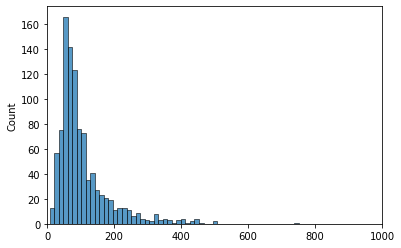

In [ ]:
# showing that the number of tokens in each review dramatically decreases after processing.
import seaborn as sns

counter = Counter()
tok_num = []
for review in cleaned_reviews:
    counter += Counter(review)
    tok_num.append(len(review))

print(counter.most_common(10))
g = sns.histplot(tok_num)
g.set(xlim=(0, 1000))

[('the', 10743), (',', 10355), ('.', 9522), ('a', 5984), ('of', 5386), ('and', 5371), ('to', 5213), ('/', 4141), ('>', 4140), ('<', 4138)]


[(0.0, 1000.0)]

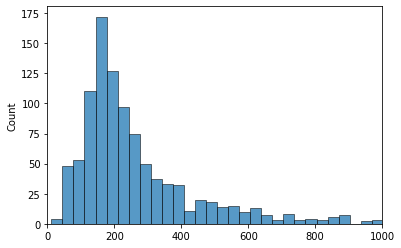

In [ ]:
import seaborn as sns

counter = Counter()
tok_num = []
for review in unclean_reviews:
    counter += Counter(review)
    tok_num.append(len(review))

print(counter.most_common(10))
g = sns.histplot(tok_num)
g.set(xlim=(0, 1000))

# Part 3: Evaluation, Naive Bayes, Bag of Words

The naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

To represent each review as a set of features, we take the count of each unique token. This can be done using the Count Vectorizer Object from Sci-kit learn

In [ ]:
# splitting the data into train-test sets
from sklearn.model_selection import train_test_split 

imdb_new = imdb.iloc[pd.np.r_[0:1000, 20000:21000]] # getting smaller slice of both neg and pos

X = imdb_new['text']
Y = imdb_new['sentiment']
Y=Y.astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=1996)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# transform text data, compare no processing to processing
CV = CountVectorizer(stop_words='english', tokenizer=process_text)
CV_train = CV.fit(X_train)
vocab = CV.vocabulary_

CV_none = CountVectorizer()
CV_train_none = CV_none.fit(X_train)
vocab_none = CV_none.vocabulary_

# use only vocab from train data to make features
CV = CountVectorizer(stop_words='english', tokenizer=process_text, vocabulary = vocab)
CV_none = CountVectorizer(vocabulary = vocab_none)

X_train_bow = CV.fit_transform(X_train)
X_test_bow = CV.fit_transform(X_test)

X_train_bow_none = CV_none.fit_transform(X_train)
X_test_bow_none = CV_none.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'wh

In [ ]:
# how a review is represented as a count of features
print(X_train_bow[0])
print(vocab)

  (0, 693)	1
  (0, 752)	1
  (0, 830)	1
  (0, 975)	1
  (0, 1025)	1
  (0, 1087)	1
  (0, 1154)	1
  (0, 1207)	1
  (0, 1241)	1
  (0, 1885)	2
  (0, 2321)	1
  (0, 2479)	1
  (0, 2667)	1
  (0, 2798)	1
  (0, 2832)	1
  (0, 3035)	1
  (0, 4526)	1
  (0, 4967)	3
  (0, 5165)	1
  (0, 5628)	3
  (0, 5799)	2
  (0, 5851)	1
  (0, 5883)	4
  (0, 5958)	1
  (0, 7261)	1
  :	:
  (0, 10616)	1
  (0, 11116)	1
  (0, 11308)	2
  (0, 12074)	2
  (0, 12136)	3
  (0, 12498)	1
  (0, 12630)	1
  (0, 12895)	2
  (0, 12954)	1
  (0, 12962)	1
  (0, 13023)	1
  (0, 13025)	1
  (0, 13097)	1
  (0, 13348)	1
  (0, 13694)	1
  (0, 13833)	1
  (0, 14032)	3
  (0, 14033)	2
  (0, 14160)	1
  (0, 14211)	1
  (0, 14301)	1
  (0, 14316)	2
  (0, 14432)	5
  (0, 14452)	2
  (0, 14470)	1
{'carlo': 1885, 'mencia': 8177, 'continu': 2667, 'violent': 14033, 'hate': 5799, 'scream': 11308, 'women': 14432, 'like': 7498, 'black': 1241, 'peopl': 9541, 'wors': 14470, 'rememb': 10616, 'b': 830, 'word': 14452, 'unlik': 13694, 'n': 8657, 'pejor': 9523, 'term': 12954, '

In [ ]:
# Bag of Words with no processing is almost 1.5 the size.
X_train_bow
X_train_bow_none

<1500x22419 sparse matrix of type '<class 'numpy.int64'>'
	with 206400 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


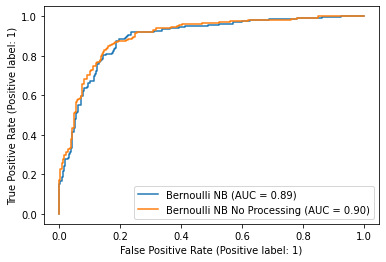

In [ ]:
# running the model, then comparing outputs
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn import metrics

bnb = BernoulliNB().fit(X_train_bow, Y_train)
bnb_none = BernoulliNB().fit(X_train_bow_none, Y_train)

import matplotlib.pyplot as plt
# plotting the ROC curve
fig, ax = plt.subplots()

metrics.plot_roc_curve(bnb, X_test_bow, Y_test, ax=ax, name = 'Bernoulli NB')  # doctest: +SKIP
metrics.plot_roc_curve(bnb_none, X_test_bow_none, Y_test, ax=ax, name = 'Bernoulli NB No Processing')  # doctest: +SKIP

In [ ]:
# top happy features
feature_names = CV.get_feature_names()
topn = sorted(zip(bnb.coef_[0], feature_names))[-20:]
topn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-1.4773917911445924, 'work'),
 (-1.4432975798016168, 'best'),
 (-1.4432975798016168, 'end'),
 (-1.4377265347521613, 'scene'),
 (-1.3995747687877849, 'mani'),
 (-1.3628252265790435, 'peopl'),
 (-1.3525687264118549, 'way'),
 (-1.3424163549478365, 'play'),
 (-1.3323660190943354, 'think'),
 (-1.3224156882411666, 'look'),
 (-1.2280060037700924, 'love'),
 (-1.2013377566879306, 'realli'),
 (-1.145886452151717, 'charact'),
 (-1.089419840483946, 'great'),
 (-1.0547342824960557, 'stori'),
 (-0.9887763147042579, 'watch'),
 (-0.9746915748225193, 'good'),
 (-0.9746915748225193, 'make'),
 (-0.9038356380551749, 'time'),
 (-0.7362805513775212, 'like')]

In [ ]:
pos_review = 'I am very much in love with this film.'
pos_CV = CV.transform([pos_review])
scores = bnb.predict_proba(pos_CV)[0]
print(f'Positive Sentiment Score: {"{:.0%}".format(scores[0])}')
print(f'Negative Sentiment Score: {"{:.0%}".format(scores[1])}')


Positive Sentiment Score: 92%
Negative Sentiment Score: 8%


In [ ]:
mixed_reivew = 'There are some parts I greatly enjoyed, and there are some parts I disliked. Not disappointed or surprised, just watched.'
mix_CV = CV.transform([mixed_reivew])
scores = bnb.predict_proba(mix_CV)[0]
print(f'Positive Sentiment Score: {"{:.0%}".format(scores[0])}')
print(f'Negative Sentiment Score: {"{:.0%}".format(scores[1])}')

Positive Sentiment Score: 65%
Negative Sentiment Score: 35%
